<a href="https://colab.research.google.com/github/sanjana220200/AirBNB_EnsembleProject/blob/Hyperparameter-Tuning/Airbnb_data_analysis_and_price_prediction_XGB_Tuned.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

Loading Dataset

In [ ]:
mydata=pd.read_csv('AB_NYC_2019.csv')
mydata.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


Preprocessing

In [ ]:
mydata.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [ ]:
#Converting column Last_review to datetime type from type object
mydata["last_review"] = pd.to_datetime(mydata["last_review"])
mydata.dtypes

id                                         int64
name                                      object
host_id                                    int64
host_name                                 object
neighbourhood_group                       object
neighbourhood                             object
latitude                                 float64
longitude                                float64
room_type                                 object
price                                      int64
minimum_nights                             int64
number_of_reviews                          int64
last_review                       datetime64[ns]
reviews_per_month                        float64
calculated_host_listings_count             int64
availability_365                           int64
dtype: object

In [ ]:
#checking for missing values
mydata.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [ ]:
#Deleting null values of no importance. Note: Reviews per month column had a lot of missing rows but is important for analysis,hence missing values will be replaced with the mean of that column.

mydata['reviews_per_month'].fillna(mydata['reviews_per_month'].mean(),inplace=True)
mydata.drop(columns=['host_name', 'last_review'], axis=1, inplace=True)
mydata.isnull().sum()

id                                 0
name                              16
host_id                            0
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
reviews_per_month                  0
calculated_host_listings_count     0
availability_365                   0
dtype: int64

Exploratory Data Analysis

Correlation

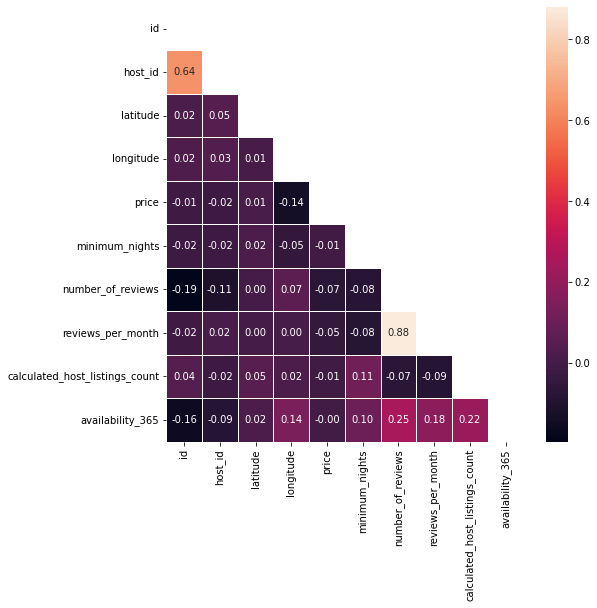

In [ ]:
import seaborn as sns
corr_1 = mydata.corr()
fig, ax = plt.subplots(figsize=(8, 8))
dropSelf = np.zeros_like(corr_1)
dropSelf[np.triu_indices_from(dropSelf)] = True
sns.heatmap(corr_1, linewidths=.5, annot=True, fmt=".2f", mask=dropSelf)
plt.show()

#Correlation heatmap shows a high correlation between number of reviews and reviews per month.

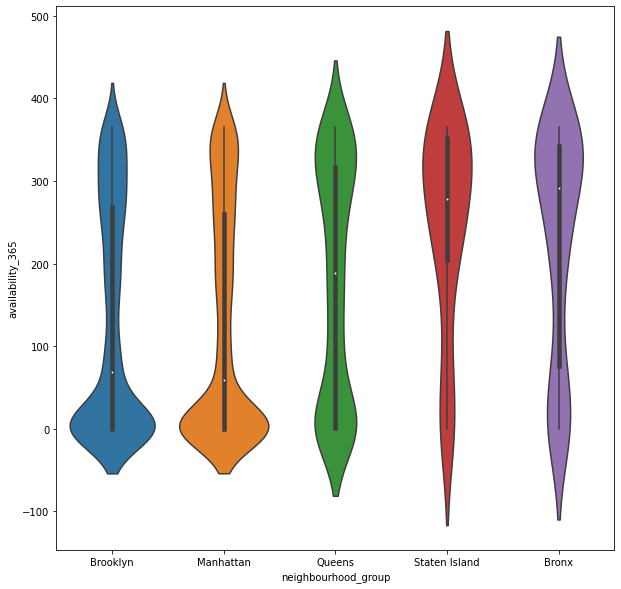

In [ ]:
#Relation between neighbourhood group and availability
plt.figure(figsize=(10,10))
ax = sns.violinplot(data=mydata, x="neighbourhood_group", y="availability_365")
#Violin Plot shows that Staten Island has the highest mean availability value around 220-250 days compared to others

<AxesSubplot:xlabel='neighbourhood_group', ylabel='price'>

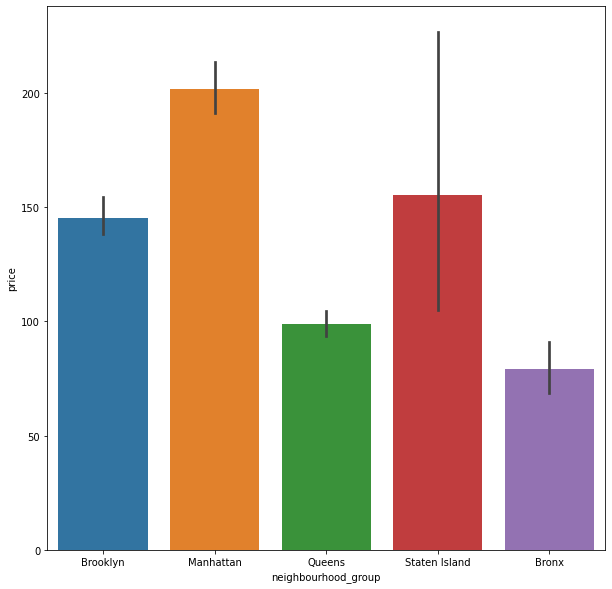

In [ ]:
#Relation between neighbourhood group and price
plt.figure(figsize=(10,10))
sns.barplot(data=mydata, x='neighbourhood_group', y='price')
#Result shows that Manhattan has the most expensive prices.

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


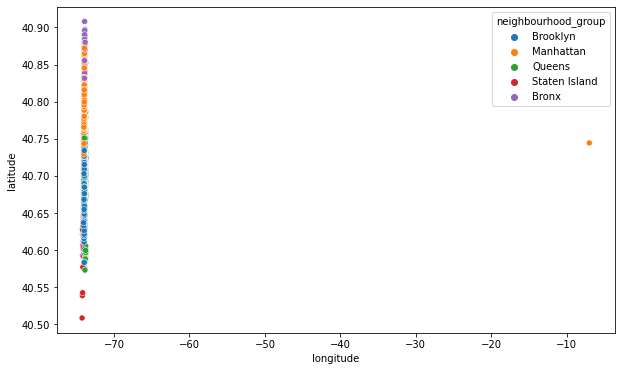

In [ ]:
#Scatterplot to visualise latitude and longitude 
plt.figure(figsize=(10,6))
sns.scatterplot(mydata.longitude,mydata.latitude,hue=mydata.neighbourhood_group)
plt.ioff()
#Result shows density is high for manhattan and brooklyn

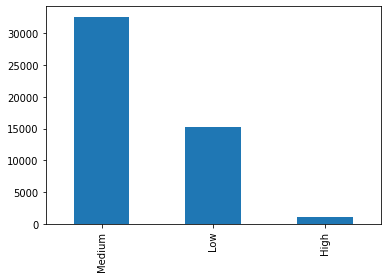

In [ ]:
# Categorising rooms based on prices.
# Prices < 75 dollars are low, 75 < 500 dollars are medium and  500 dollars< high
def categorise(hotel_price):
    if hotel_price<=75:
        return 'Low'
    elif hotel_price >75 and hotel_price<=500:
        return 'Medium'
    else:
        return 'High'
mydata['price'].apply(categorise).value_counts().plot(kind='bar');

#Most of the rooms fall in the Medium (75-500 $) category followed by Low and High range rooms.Very few people prefer to live in high priced rooms.

<Figure size 720x432 with 0 Axes>

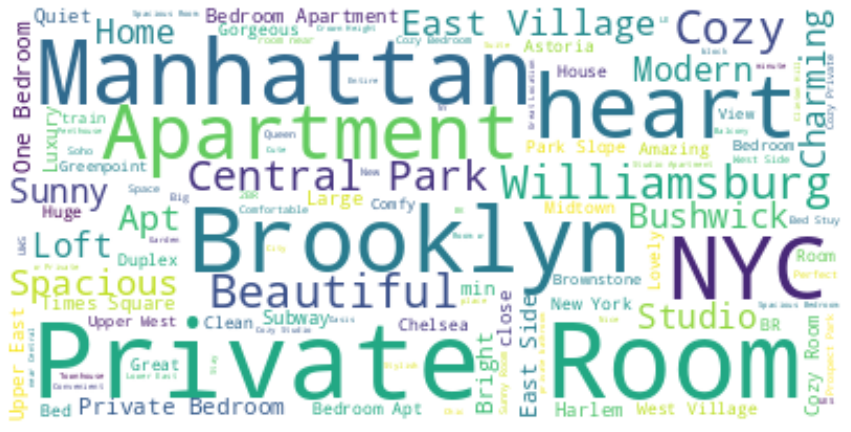

In [ ]:
#word cloud to analyse names of listings 

import wordcloud
from wordcloud import WordCloud, ImageColorGenerator
text = " ".join(str(each) for each in mydata.name)
# Create and generate a word cloud image:
wordcloud = WordCloud(max_words=200, background_color="white").generate(text)
plt.figure(figsize=(10,6))
plt.figure(figsize=(15,10))
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
pass

#Our word cloud shows the words that are more often used in the Name of this listings
#Result shows that most of the words are related to the description,place and the experience in the room.

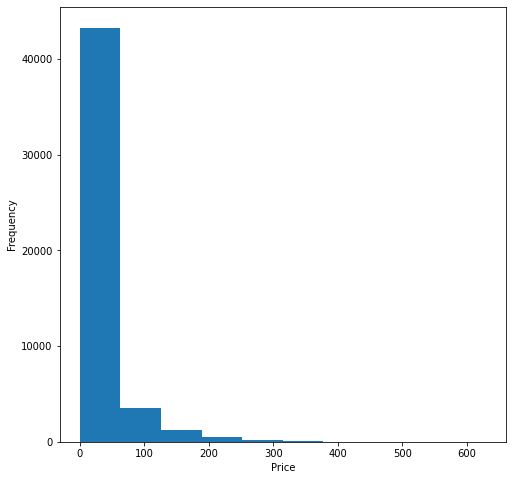

In [ ]:
#Analysing number of reviews
plt.figure(figsize=(8,8))
mydata['number_of_reviews'].plot(kind='hist')
plt.xlabel("Price")
plt.ioff()
plt.show()

#From the histogram we can see that low cost rooms or in range 0-50 $ have more reviews.
#This shows us that people who pay more for the rooms generally dont write reviews.

# Modelling for price predictions 

Price prediction based on name

In [ ]:
mydata['name'].isnull().sum()

16

In [ ]:
#There are 16 names fields as NaN. Replace them with empty string.
mydata['name'].fillna('', inplace=True)
mydata['name'].isnull().sum()

0

In [ ]:
#Remove punctuation, digits and special characters.
import re
def remove_punctuation_digits_specialchar(line):
    return re.sub('[^A-Za-z]+', ' ', line).lower()

mydata['clean_name'] = mydata['name'].apply(remove_punctuation_digits_specialchar)
# Compare raw and cleaned texts.
mydata[['name', 'clean_name']].head()

,name,clean_name
0,Clean & quiet apt home by the park,clean quiet apt home by the park
1,Skylit Midtown Castle,skylit midtown castle
2,THE VILLAGE OF HARLEM....NEW YORK !,the village of harlem new york
3,Cozy Entire Floor of Brownstone,cozy entire floor of brownstone
4,Entire Apt: Spacious Studio/Loft by central park,entire apt spacious studio loft by central park


In [ ]:
# remove stop words
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.util import ngrams

from nltk.corpus import stopwords


def tokenize_no_stopwords(line):
    tokens = nltk.tokenize.word_tokenize(line)
    tokens_no_stop = [w for w in tokens if w not in stopwords.words('english')]
    return " ".join(tokens_no_stop)
mydata['final_name'] = mydata['clean_name'].apply(tokenize_no_stopwords)
mydata[['clean_name', 'final_name']].head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,clean_name,final_name
0,clean quiet apt home by the park,clean quiet apt home park
1,skylit midtown castle,skylit midtown castle
2,the village of harlem new york,village harlem new york
3,cozy entire floor of brownstone,cozy entire floor brownstone
4,entire apt spacious studio loft by central park,entire apt spacious studio loft central park


In [ ]:
#define: price > 300 as expensive and <300 as affordable.
#split dataset into 80% training and 20% test dataset
#We use TF-IDF metric to represent the weights of each feature

LGBM classifier


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from lightgbm import LGBMRegressor, LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, f1_score, classification_report, mean_absolute_error, r2_score
from imblearn.over_sampling import RandomOverSampler
OS = RandomOverSampler(sampling_strategy='auto', random_state=0)
def classify_as_cheap_or_expensive(line):
    if line > 300:
        return 1
    else:
        return 0
        
mydata['target'] = mydata['price'].apply(classify_as_cheap_or_expensive)
mydata['target'].value_counts()
train, test = train_test_split(mydata, test_size=0.2, random_state=315, stratify=mydata['target'])

X_train, y_train = train['final_name'], train['target']
X_test, y_test = test['final_name'], test['target']
vect = TfidfVectorizer()
X_train = vect.fit_transform(X_train)
X_test = vect.transform(X_test)
ros = RandomOverSampler(sampling_strategy='minority', random_state=1)

X_train_ros, y_train_ros = OS.fit_resample(X_train, y_train)

lr = LGBMClassifier(random_state=315)
lr.fit(X_train_ros, y_train_ros)
preds = lr.predict(X_test)

print(classification_report(y_test, preds))
print("Accuracy: {0:.3f}".format(accuracy_score(y_test, preds)))
print("Recall: {0:.3f}".format(recall_score(y_test, preds)))

              precision    recall  f1-score   support

           0       0.97      0.82      0.89      9108
           1       0.22      0.69      0.33       671

    accuracy                           0.81      9779
   macro avg       0.59      0.75      0.61      9779
weighted avg       0.92      0.81      0.85      9779

Accuracy: 0.808
Recall: 0.689


In [ ]:
#The scores aren't perfect but taking into account that the predicting model is built solely on textual descriptions of a listing, it seems like the words in Airbnb titles actually do matter!

In [ ]:
mydata.head()

,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,clean_name,final_name,target
0,2539,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.210000,6,365,clean quiet apt home by the park,clean quiet apt home park,0
1,2595,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.380000,2,355,skylit midtown castle,skylit midtown castle,0
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1.373221,1,365,the village of harlem new york,village harlem new york,0
3,3831,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.640000,1,194,cozy entire floor of brownstone,cozy entire floor brownstone,0
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.100000,1,0,entire apt spacious studio loft by central park,entire apt spacious studio loft central park,0


In [ ]:
mydata.drop(columns=['target', 'clean_name'], axis=1, inplace=True)
mydata.head()

,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,final_name
0,2539,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.210000,6,365,clean quiet apt home park
1,2595,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.380000,2,355,skylit midtown castle
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1.373221,1,365,village harlem new york
3,3831,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.640000,1,194,cozy entire floor brownstone
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.100000,1,0,entire apt spacious studio loft central park


In [ ]:
#Split data into categorical features and numeric by using encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()                                            # Fit label encoder
le.fit(mydata['neighbourhood_group'])
mydata['neighbourhood_group']=le.transform(mydata['neighbourhood_group'])    # Transform labels to normalized encoding.

le = LabelEncoder()
le.fit(mydata['neighbourhood'])
mydata['neighbourhood']=le.transform(mydata['neighbourhood'])

le =LabelEncoder()
le.fit(mydata['room_type'])
mydata['room_type']=le.transform(mydata['room_type'])


mydata.head()

,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,final_name
0,2539,Clean & quiet apt home by the park,2787,1,108,40.64749,-73.97237,1,149,1,9,0.210000,6,365,clean quiet apt home park
1,2595,Skylit Midtown Castle,2845,2,127,40.75362,-73.98377,0,225,1,45,0.380000,2,355,skylit midtown castle
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,2,94,40.80902,-73.94190,1,150,3,0,1.373221,1,365,village harlem new york
3,3831,Cozy Entire Floor of Brownstone,4869,1,41,40.68514,-73.95976,0,89,1,270,4.640000,1,194,cozy entire floor brownstone
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,2,61,40.79851,-73.94399,0,80,10,9,0.100000,1,0,entire apt spacious studio loft central park


Linear Regression Model 

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
lm = LinearRegression()
mydata=mydata[mydata.price>0]
mydata=mydata[mydata.availability_365>0]

X = mydata[['neighbourhood_group','neighbourhood','room_type','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']]
#Prices are not normally distributed as well as there is alot of noise. Logarithmic conversion of data with huge variance can be normalised by logarithmic algorithm.
y= np.log10(mydata['price'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

# lm.fit(X_train,y_train)
# from sklearn.metrics import mean_absolute_error
# y_predicts = lm.predict(X_test)

# print("""
#         Mean Squared Error: {}
#         R2 Score: {}
#         Mean Absolute Error: {}
#      """.format(
#         np.sqrt(metrics.mean_squared_error(y_test, y_predicts)),
#         r2_score(y_test,y_predicts) * 100,
#         mean_absolute_error(y_test,y_predicts)
#         ))

Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor

Reg_tree=DecisionTreeRegressor(criterion='squared_error',max_depth=3,random_state=0)
Reg_tree=Reg_tree.fit(X_train,y_train)

y_predicts=Reg_tree.predict(X_test)
print("median absolute deviation (MAD): ",np.mean(abs(np.multiply(np.array(y_test.T-y_predicts),np.array(1/y_test)))))
print("""
        Mean Squared Error: {}
        R2 Score: {}
        Mean Absolute Error: {}
     """.format(
        np.sqrt(metrics.mean_squared_error(y_test, y_predicts)),
        r2_score(y_test,y_predicts) * 100,
        mean_absolute_error(y_test,y_predicts)
        ))

median absolute deviation (MAD):  0.07953946647160076

        Mean Squared Error: 0.22889689464980478
        R2 Score: 46.52324351141029
        Mean Absolute Error: 0.16583322887806484
     


Ridge Model

In [ ]:
from sklearn import linear_model
ridge_model = linear_model.Ridge(alpha = 0.01)
ridge_model.fit(X_train, y_train)             
y_predicts = ridge_model.predict(X_test) 
print("""
        Mean Squared Error: {}
        R2 Score: {}
        Mean Absolute Error: {}
     """.format(
        np.sqrt(metrics.mean_squared_error(y_test, y_predicts)),
        r2_score(y_test,y_predicts) * 100,
        mean_absolute_error(y_test,y_predicts)
        ))


        Mean Squared Error: 0.23993363920925598
        R2 Score: 41.24192772304195
        Mean Absolute Error: 0.17677653609308913
     


Lasso Model

In [ ]:
from sklearn import linear_model
Lasso_model = linear_model.Lasso(alpha = 0.001)
Lasso_model.fit(X_train, y_train)
y_predicts = Lasso_model.predict(X_test) 
print("""
        Mean Squared Error: {}
        R2 Score: {}
        Mean Absolute Error: {}
     """.format(
        np.sqrt(metrics.mean_squared_error(y_test, y_predicts)),
        r2_score(y_test,y_predicts) * 100,
        mean_absolute_error(y_test,y_predicts)
        ))


        Mean Squared Error: 0.2399080328201835
        R2 Score: 41.25446870544215
        Mean Absolute Error: 0.1767949649280998
     


### TEST

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import f_classif, SelectKBest

from sklearn.preprocessing import StandardScaler,MinMaxScaler,OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector as selector
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor, AdaBoostRegressor
from sklearn.model_selection import cross_val_predict,cross_val_score,cross_validate
from sklearn.model_selection import GridSearchCV

In [ ]:
selected_feature = ['neighbourhood_group','neighbourhood','latitude','longitude','number_of_reviews','room_type','minimum_nights',\
                    'reviews_per_month','calculated_host_listings_count','availability_365','host_id']
x_data = mydata[selected_feature]
y_data = mydata['price']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [ ]:
#define numerical and categorical columns
numerical_columns_selector = selector(dtype_exclude=object)
categorical_columns_selector = selector(dtype_include=object)

numerical_columns = numerical_columns_selector(X_train)
categorical_columns = categorical_columns_selector(X_train)
print(numerical_columns)
print(categorical_columns)

['minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']
['neighbourhood_group', 'neighbourhood', 'room_type']


In [ ]:
#define preprocessor to all selected columns
preprocessor = ColumnTransformer([
    ('one-hot-encoder', OneHotEncoder(handle_unknown="ignore"), categorical_columns),
    ('standard_scaler', StandardScaler(), numerical_columns)])

GRADIENT BOOST

In [ ]:
model2 = make_pipeline(preprocessor, GradientBoostingRegressor())
model2.fit(X_train, y_train)

y_pred = model2.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("r2 score:", r2)

# Perform cross-validation using the cross_val_score function
scores = cross_val_score(model2, X_train, y_train, cv=5, scoring='r2')

# Calculate and print the mean and standard deviation of the cross-validation scores
print("Cross-validation R-squared scores: {}".format(scores))
print("Mean R-squared score: {:.3f}".format(np.mean(scores)))
print("Standard deviation of R-squared scores: {:.3f}".format(np.std(scores)))

# Newtrial
# r2 score: 0.570520886831662
# Cross-validation R-squared scores: [0.55271635 0.56773098 0.57681472 0.57374838 0.57016503]
# Mean R-squared score: 0.568
# Standard deviation of R-squared scores: 0.008

r2 score: 0.570520886831662
Cross-validation R-squared scores: [0.55271635 0.56773098 0.57681472 0.57374838 0.57016503]
Mean R-squared score: 0.568
Standard deviation of R-squared scores: 0.008


XGBOOST

In [ ]:
model3 = make_pipeline(preprocessor,xgb.XGBRegressor(objective="reg:linear", learning_rate = 0.05, random_state=42, n_estimators = 1000, max_depth = 10))
model3.fit(X_train, y_train)
y_pred = model3.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("r2 score:", r2)

# Perform cross-validation using the cross_val_score function
scores = cross_val_score(model3, X_train, y_train, cv=5, scoring='r2')

# Calculate and print the mean and standard deviation of the cross-validation scores
print("Cross-validation R-squared scores: {}".format(scores))
print("Mean R-squared score: {:.3f}".format(np.mean(scores)))
print("Standard deviation of R-squared scores: {:.3f}".format(np.std(scores)))

# trail0: 0.556
# trail2: 0.564
# 0.571 learning_rate = 0.05, random_state=42, n_estimators = 800, max_depth = 7))

[14:26:47] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
r2 score: 0.6148993898750441
[14:27:11] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[14:27:33] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[14:28:04] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[14:28:27] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[14:28:48] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
Cross-validation R-squared scores: [0.58561906 0.60575349 0.60655556 0.60166638 0.60511038]
Mean R-squared score: 0.601
Standard deviation of R-squared scores: 0.008


In [ ]:
# Create a pipeline with XGBoost regressor
model = make_pipeline(preprocessor, xgb.XGBRegressor(objective="reg:linear", random_state=42))

# Define the hyperparameter grid
param_grid = {
    'xgbregressor__learning_rate': [0.01, 0.05, 0.1],
    'xgbregressor__max_depth': [3, 5, 10],
    'xgbregressor__n_estimators': [500, 1000, 2000],
}

# Create a GridSearchCV object
grid_search = GridSearchCV(
    model,
    param_grid,
    cv=5,
    scoring='r2',
)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding R-squared score
print("Best hyperparameters: {}".format(grid_search.best_params_))
print("Best R-squared score: {:.3f}".format(grid_search.best_score_))

# Fit the model using the best hyperparameters
model3 = make_pipeline(preprocessor, xgb.XGBRegressor(
    objective="reg:linear",
    learning_rate=grid_search.best_params_['xgbregressor__learning_rate'],
    max_depth=grid_search.best_params_['xgbregressor__max_depth'],
    n_estimators=grid_search.best_params_['xgbregressor__n_estimators'],
    random_state=42
))

model3.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model3.predict(X_test)

# Calculate the R-squared score on the test set
r2 = r2_score(y_test, y_pred)
print("R-squared score on test set: {:.3f}".format(r2))

# Perform cross-validation using the cross_val_score function
scores = cross_val_score(model3, X_train, y_train, cv=5, scoring='r2')

# Calculate and print the mean and standard deviation of the cross-validation scores
print("Cross-validation R-squared scores: {}".format(scores))
print("Mean R-squared score: {:.3f}".format(np.mean(scores)))
print("Standard deviation of R-squared scores: {:.3f}".format(np.std(scores)))

[14:35:44] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[14:35:47] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[14:35:52] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[14:35:55] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[14:35:57] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[14:36:02] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[14:36:07] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[14:36:13] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[14:36:18] WARNING: ../src/objective/regression_

RANDOM FOREST

In [ ]:
model4 = make_pipeline(preprocessor, RandomForestRegressor(n_estimators=500,max_depth = 12 ))
model4.fit(X_train, y_train)
y_pred = model4.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("r2 score:", r2)

# # Perform cross-validation using the cross_val_score function
# scores = cross_val_score(model4, X_train, y_train, cv=5, scoring='r2')

# # Calculate and print the mean and standard deviation of the cross-validation scores
# print("Cross-validation R-squared scores: {}".format(scores))
# print("Mean R-squared score: {:.3f}".format(np.mean(scores)))
# print("Standard deviation of R-squared scores: {:.3f}".format(np.std(scores)))

# trail0 record:0.5565972102236798
# trail2: 0.5706104812277776

ValueError: ignored

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

#X_train, X_test, y_train, y_test

def tune_random_forest(X_train, y_train, X_val, y_val):
    
    # Define hyperparameters and parameter grid
    param_grid = {
        'n_estimators': [100, 500, 1000],
        'max_depth': [3, 5, 7, 9],
        'max_features': ['sqrt', 'log2', 0.25, 0.5],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_leaf_nodes': [None, 5, 10, 20],
        'min_impurity_decrease': [0, 0.1, 0.2],
        'bootstrap': [True, False],
        'class_weight': [None, 'balanced', 'balanced_subsample']
    }
    
    # Create random forest classifier and perform grid search
    clf = RandomForestClassifier(random_state=42)
    grid_search = GridSearchCV(clf, param_grid=param_grid, cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    # Get best hyperparameters and evaluate performance
    best_params = grid_search.best_params_
    print("Best parameters:", best_params)
    
    clf = RandomForestClassifier(**best_params, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    print("Validation accuracy:", accuracy)
    
    return clf


AttributeError: ignored

ADABOOST

In [ ]:
model5 = make_pipeline(preprocessor,AdaBoostRegressor(n_estimators=500, random_state=42))
model5.fit(X_train, y_train)
y_pred = model5.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("r2 score:", r2)

# Perform cross-validation using the cross_val_score function
scores = cross_val_score(model5, X_train, y_train, cv=5, scoring='r2')

# Calculate and print the mean and standard deviation of the cross-validation scores
print("Cross-validation R-squared scores: {}".format(scores))
print("Mean R-squared score: {:.3f}".format(np.mean(scores)))
print("Standard deviation of R-squared scores: {:.3f}".format(np.std(scores)))

r2 score: 0.31710075089444323
Cross-validation R-squared scores: [0.31330298 0.16982846 0.29984476 0.32129021 0.36633704]
Mean R-squared score: 0.294
Standard deviation of R-squared scores: 0.066
